In [26]:
import pandas as pd
print(pd.__version__)

2.3.3


In [27]:
data = pd.read_csv('data/인구현황.csv')
print(data.shape)
print(type(data))

(18, 8)
<class 'pandas.core.frame.DataFrame'>


In [28]:
# head() 함수
data.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1000000000,전국,51217221,24118928,2.12,25498324,25718897,0.99
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00


In [ ]:
# tail() 함수
data.tail()

In [ ]:
# info() 함수
data.info()

In [ ]:
# describe() 함수, 숫자 타입인 컬럼의 통계함수 출력
data.describe()

In [ ]:
#numpy np.number 속성을 사용해서 describe()
import numpy as np
data.describe(include=np.number)

In [33]:
# '전국'이 포함된 합계 행 제외
data_region_only = data[data['행정기관'].str.contains('전국') == False].copy()
# 정렬을 통해 상위 5개를 먼저 추출 (가장 인구가 많은 순서대로)
top5_data = data_region_only.sort_values(by='총인구수', ascending=False).head(5)
result = top5_data.loc[:, ['행정기관', '총인구수']].reset_index(drop=True)
result.index = result.index + 1  # 0~4인 인덱스를 1~5로 변환


print(result)

    행정기관      총인구수
1    경기도  13694685
2  서울특별시   9331828
3  부산광역시   3266598
4   경상남도   3228380
5  인천광역시   3021010


Figure(1800x1200)
Axes(0.125,0.53;0.775x0.35)
Axes(0.125,0.11;0.775x0.35)


<Axes: xlabel='행정기관', ylabel='총인구수'>

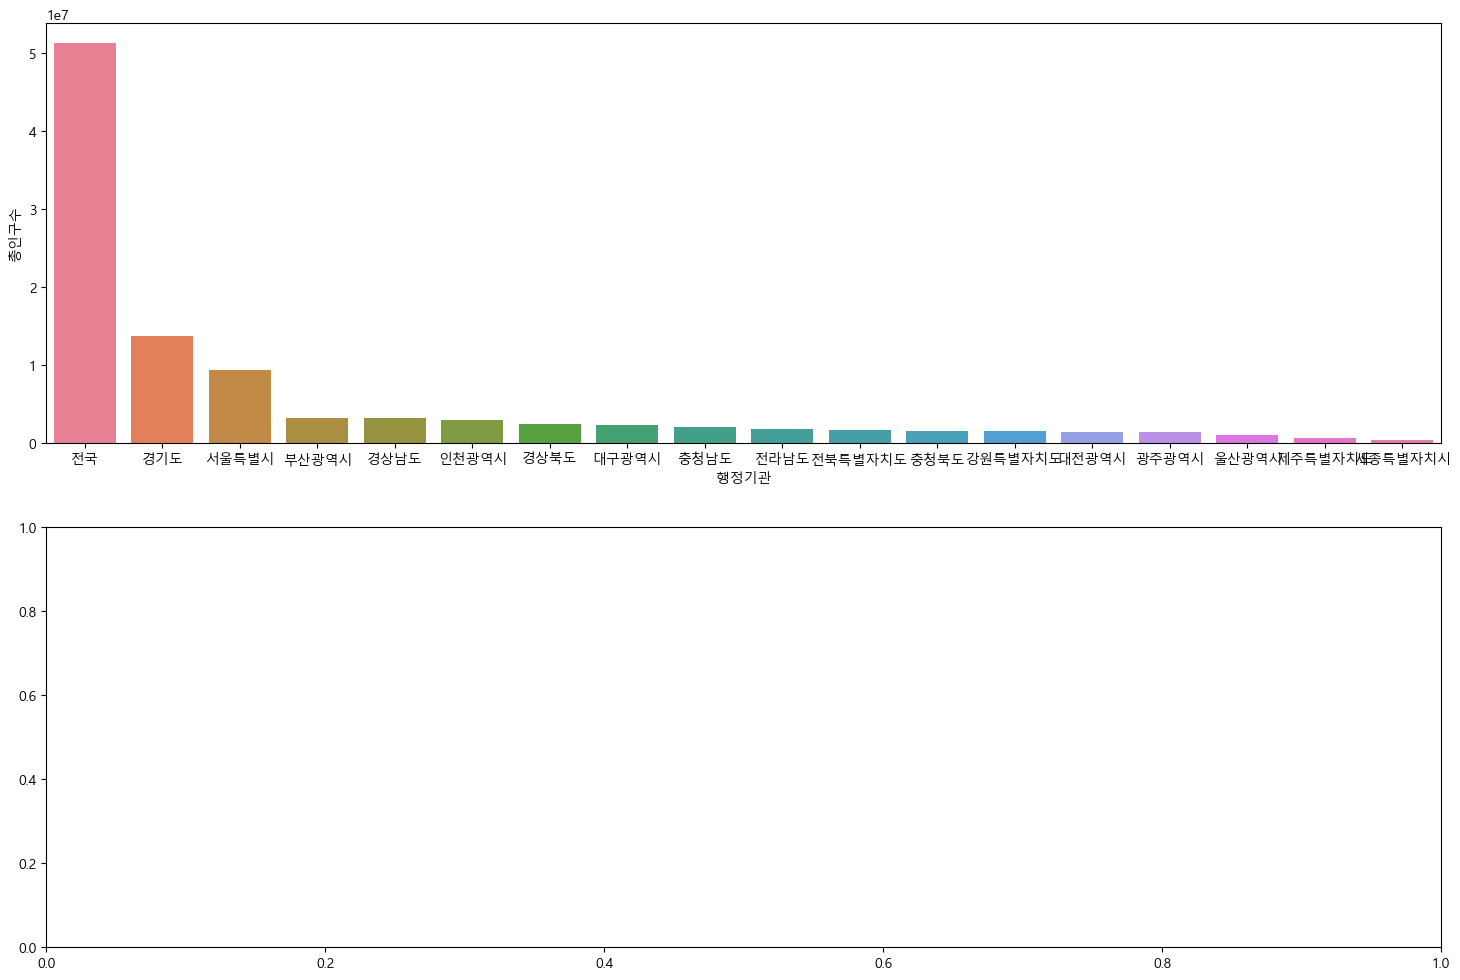

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# subplots() 함수를 사용하여 axes 객체를 생성하기
figure, (axes1, axes2)= plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes1)
print(axes2)
# seaborn의 barplot() 함수 호출하기 - 행정구역과 인구수
sns.barplot(data=data.sort_values(by='총인구수', ascending=False), x='행정기관', y='총인구수', ax=axes1, hue='행정기관')

In [ ]:
# 2. 세대당 인구수 높은 지역 Top5


      행정기관  세대당 인구
1  세종특별자치시    2.39
2      경기도    2.26
3    울산광역시    2.22
4    인천광역시    2.20
5    대구광역시    2.14


In [ ]:
# 2-2 